In [1]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from time import time
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1500, centers=4, cluster_std=0.6, random_state=0)

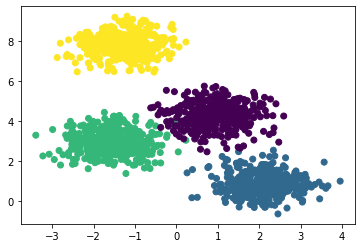

In [2]:
plt.scatter(X[:,0], X[:,1],c=y)

In [3]:
class KMeans():
    
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        m , n = X.shape
        
        rng = np.random.RandomState(99)
        i = rng.permutation(m)[:self.n_clusters]
        centers = X[i]
        batch_size = 100
        
        for ix in np.arange(self.max_iter):
            idx = rng.randint(m)
            Xi = X[idx : idx + batch_size]
            labels = self.predict(Xi, centers)
            
            new_centers = []
            for j in range(self.n_clusters):
                new_centers.append(Xi[labels==j].mean(axis=0))
                
            new_centers = np.array(new_centers)
            
#             if (iter % 20 ==0):
#                 pred = self.predict(Xi, new_centers)
#                 plt.figure(figsize=(5, 2))
#                 plt.title(f"Iteration : {iter}")
#                 plt.scatter(Xi[:, 0], Xi[:, 1], c=pred)
#                 plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c='black', alpha=0.6)
            
            if(np.allclose(centers, new_centers, rtol=0.2)):
                break
            else:
                centers = new_centers
                
        print(f"Done in {ix} iterations")
        
        score = 0
        labels = self.predict(X, centers)
        for i in range(self.n_clusters):
            cluster_mean = X[labels ==i].mean(axis=0)
            score += ((X[labels==i] - cluster_mean)**2).sum()
        print("Total with variation score: ", score)
                
        return centers
    
    def predict(self, X, centers):
        return pairwise_distances_argmin(X, centers)

====k = 2
Done in 6 iterations
Total with variation score:  5859.027548790498
fit and predict time 0.012217998504638672
====k = 3
Done in 3 iterations
Total with variation score:  2849.7266714358066
fit and predict time 0.007846593856811523
====k = 4
Done in 9 iterations
Total with variation score:  1007.7374341654453
fit and predict time 0.013095378875732422
====k = 5
Done in 9 iterations
Total with variation score:  920.8127407429872
fit and predict time 0.011388301849365234
====k = 6
Done in 3 iterations
Total with variation score:  841.4034939553978
fit and predict time 0.006119966506958008


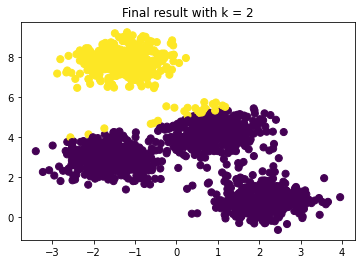

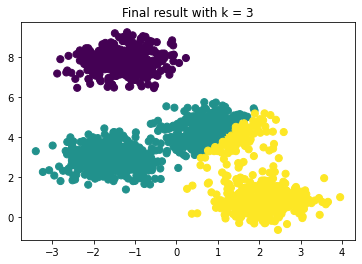

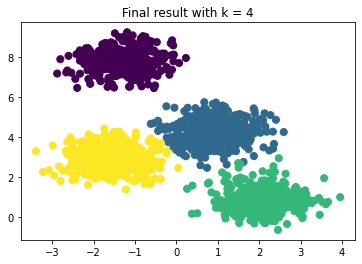

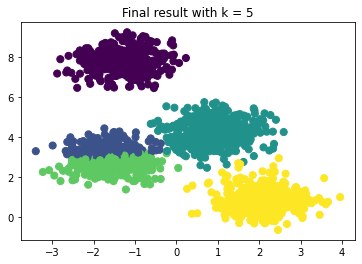

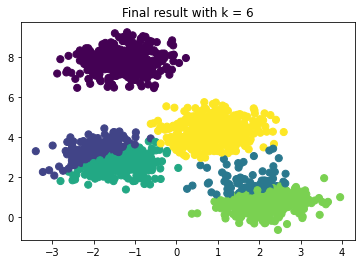

In [5]:
for k in range(2, 7):
    print('='*30)
    print(f"====k = {k}")
    start = time()
    model = KMeans(n_clusters=k)
    centers = model.fit(X)
    preds = model.predict(X, centers)
    print(f"fit and predict time {time() - start}")
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
    plt.title(f"Final result with k = {k}")